In [82]:
!pip3 install import_ipynb

In [83]:
import import_ipynb
import numpy as np
import pandas as pd
import dataScience as ds

In [84]:
def normalize(V,maxV,minV):
    if V==0:
        return V
    normalized_V = (V - minV) / (maxV - minV)
    
    return normalized_V

In [85]:
def createClusteredData(X:list,Y:list):
    newArr = []
    for index,value in enumerate(X):
        newArr.append([normalize(X[index],np.max(X),np.min(X)),normalize(Y[index],np.max(Y),np.min(Y))])
    return newArr



## Using K Means Clustering Algorithm



==>> dataForClustering.shape:  [0. 0. 0. ... 1. 1. 1.] [[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.         0.4745098 ]
 [1.         0.48039216]
 [1.         1.        ]]


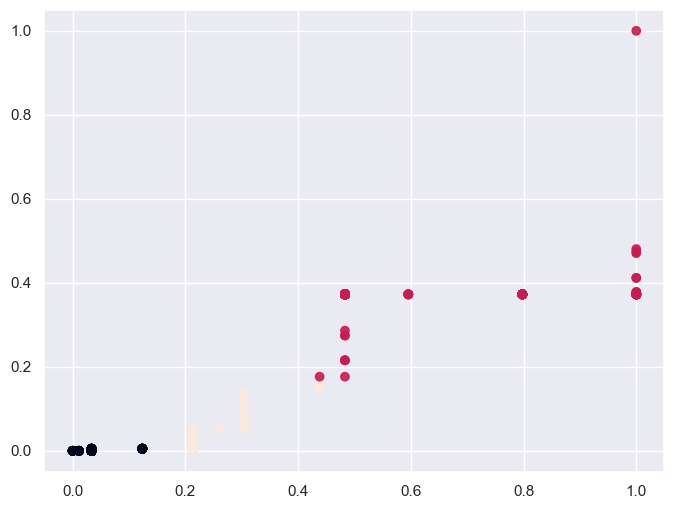

In [101]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
dataForClustering = np.array(createClusteredData(sorted(ds.expectedPayment), sorted(ds.paymentDoneByChampion)))
print(f"==>> dataForClustering.shape: ",dataForClustering[:,0],dataForClustering)


model = KMeans(n_clusters=3)

model = model.fit(dataForClustering)

plt.figure(figsize=(8, 6))

plt.scatter(dataForClustering[:,0], dataForClustering[:,1], c=model.labels_.astype(float),alpha=0.9)
plt.show()


## Real World Clustering on Active Project

Here this is an example of Clustering of Data in a real life scenario where Datas are clustered Together to give the Kmeans value . This is the scattered plot for Payment Done by the Champion verses Payment to be done on a daily basis